In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [4]:
df = pd.read_csv('iris.data', header = None)

In [5]:
df.columns = [['sepal_length', 'sepal_width','petal_length', 'petal_width', 'class']]

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_num
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


### Kmeans

Let's cluster the unlabeled data

In [6]:
to_drop = ['class']
churn_feat_space = df.drop(to_drop, axis = 1)
df_input = df.drop(to_drop, axis = 1)

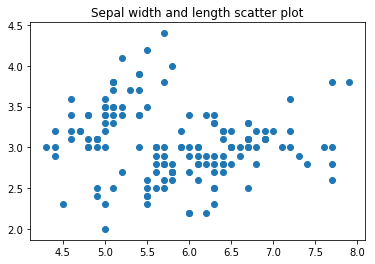

In [8]:
plt.scatter(df_input['sepal_length'], df_input['sepal_width'])
plt.title('Sepal width and length scatter plot')
plt.show()

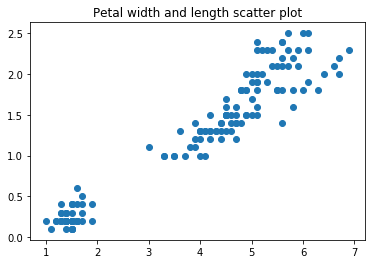

In [9]:
plt.scatter(df['petal_length'], df['petal_width'])
plt.title('Petal width and length scatter plot')
plt.show()

From above charts, it seems there are 3 clusters. Choose K = 3

In [10]:
data = df_input.as_matrix()

In [11]:
from sklearn.cluster import KMeans

num_clusters = 3

# number of clusters
km = KMeans(n_clusters=num_clusters)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
print('the cost is ', km.inertia_)

the cost is  78.9408414261


### Result Analysis, compare with true labels

Total 3 classes

In [14]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [15]:
class_dict = {
    'Iris-virginica':0,
    'Iris-setosa':1,
    'Iris-versicolor':2   
}

df.loc[:,'class_num'] = df['class'].map(class_dict)

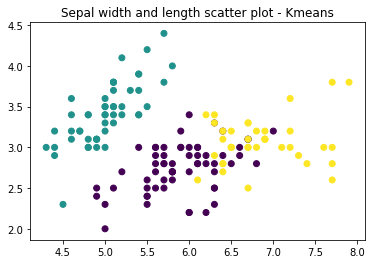

In [16]:
plt.scatter(df['sepal_length'], df['sepal_width'], c = km.labels_)
plt.title('Sepal width and length scatter plot - Kmeans')
plt.show()

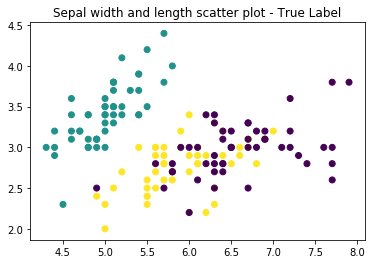

In [17]:
plt.scatter(df['sepal_length'], df['sepal_width'], c = df['class_num'])
plt.title('Sepal width and length scatter plot - True Label')
plt.show()

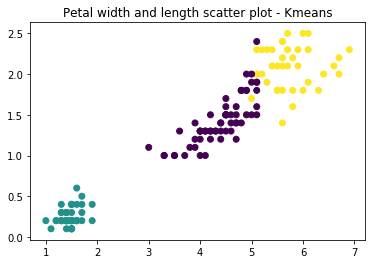

In [18]:
plt.scatter(df['petal_length'], df['petal_width'], c =  km.labels_)
plt.title('Petal width and length scatter plot - Kmeans')
plt.show()

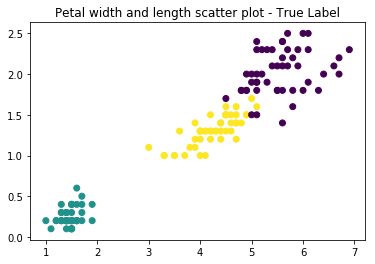

In [19]:
plt.scatter(df['petal_length'], df['petal_width'], c = df['class_num'])
plt.title('Petal width and length scatter plot - True Label')
plt.show()

Kmeans does great except some points are mis-clustered in the middle